## Least Squares Approximation: Salary v. Experience

1. Import the necessary libraries. For this assignment, we'll need `numpy`, `matplotlib.pyplot`, and `pandas`. For some of the longer module names, remember we can alias them using `as` to make their types easier to work with.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2. Open and load the CSV file `Salary_Data.csv` into a Pandas dataframe. Name the dataframe variable something unique, like 'data' or 'df'. Remember that for CSV files, there's a built-in Pandas function for reading their data.

In [4]:
df = pd.read_csv('salary_data.csv')
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


3. Use the dataframe you created to print the first 5 items (the 'head') to the output. Utilize Pandas' built-in functions for this!

In [5]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


4. Create a scatter plot using the Pandas dataframe. Make the X-axis years of experience, and the Y-axis the corresponding salary. Output the result. If you've done everything up to this point correctly, it should look like the following image:

    ![](o1.png)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

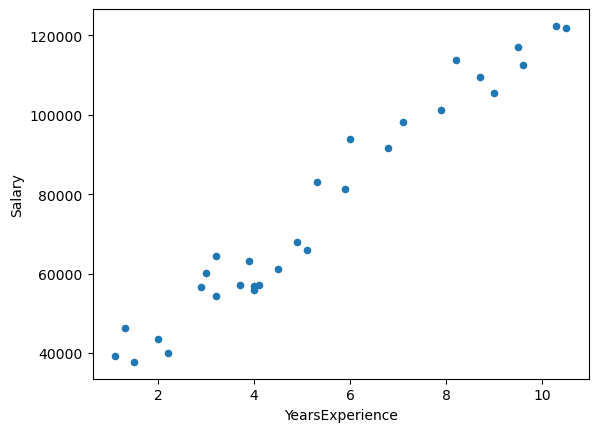

In [17]:
df.plot(kind = 'scatter', x = 'YearsExperience', y = 'Salary')

5. Implement the Least Squares approximation, to find a straight line that best approximates the data we've been provided with and plotted in the previous question. We'll be implementing this system manually - you're **not** allowed to use an external library like `numpy.linalg` to solve. You will, however, want to use the `numpy` constructions for numbers and matrices we already imported to manipulate your data.

    > As a refresher, the Least Squares Approximation finds values $\theta_0, \theta_1$ such that $y = \theta_0 + \theta_1x$ is an accurate approximation of the trend of the data provided.
    > 
    > In matrix form:
    > $$A = [1 , X]$$
    > 
    > $A$ can be thought of as a column of $1$'s and a column of sample $x$ values. Then, we define $\theta$ as:
    > 
    > $$\theta = [\theta_0, \theta_1]^t$$
    > 
    > So $b = A \theta$
    > 
    > To find the approximate result, we can use the pseudo-inverse of $A$:
    > $$\theta = [(A^t A)^{(-1)} A^t] b$$

In [65]:
array_1 = np.array([np.ones(df.shape[0]),df.YearsExperience]).T
multi = np.matmul(array_1.T,array_1)
inverse = np.linalg.inv(multi)

multi_2 = np.matmul(inverse, array_1.T)
#print(array_1)
#print(multi)
#print(inverse)
#print(multi_2)

[[ 1.29186029e-01  1.24636060e-01  1.20086090e-01  1.08711165e-01
   1.04161196e-01  8.82363016e-02  8.59613167e-02  8.14113470e-02
   8.14113470e-02  7.00364226e-02  6.54864529e-02  6.32114680e-02
   6.32114680e-02  6.09364831e-02  5.18365436e-02  4.27366041e-02
   3.81866344e-02  3.36366646e-02  1.99867554e-02  1.77117705e-02
  -4.88108423e-04 -7.31306304e-03 -2.55129420e-02 -3.23378966e-02
  -4.37128210e-02 -5.05377756e-02 -6.19127000e-02 -6.41876848e-02
  -8.01125789e-02 -8.46625487e-02]
 [-1.80400306e-02 -1.71837000e-02 -1.63273695e-02 -1.41865431e-02
  -1.33302125e-02 -1.03330555e-02 -9.90489022e-03 -9.04855965e-03
  -9.04855965e-03 -6.90773324e-03 -6.05140267e-03 -5.62323739e-03
  -5.62323739e-03 -5.19507210e-03 -3.48241097e-03 -1.76974984e-03
  -9.13419271e-04 -5.70887044e-05  2.51190299e-03  2.94006828e-03
   6.36539054e-03  7.64988639e-03  1.10752087e-02  1.23597045e-02
   1.45005309e-02  1.57850268e-02  1.79258532e-02  1.83540185e-02
   2.13511755e-02  2.22075060e-02]]


In [67]:
array_2 = np.array(df.Salary)
print(array_2)

theta = np.matmul(multi_2, array_2)
theta[0]

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


25792.20019866867

6. On top of the scatter plot you created in part **4**, we now want to use our calculated $\theta$ to draw our approximate linear regression onto the plot surface. Start with the plot from earlier, and then use the `matplotlib.pyplot.plot` function to plot the predicted line from an array of $x_{pred}$ and $y_{pred}$ predictions. You'll need to likely compute $A$ for each section of the line in order to compute $y=A \cdot \theta$ for a given point - think about how you can use Numpy and matrices to calculate all of the points in the line at once!

    If you've correctly set up your linear regression, as the end result you should see something that looks like this:

    ![](o2.png)

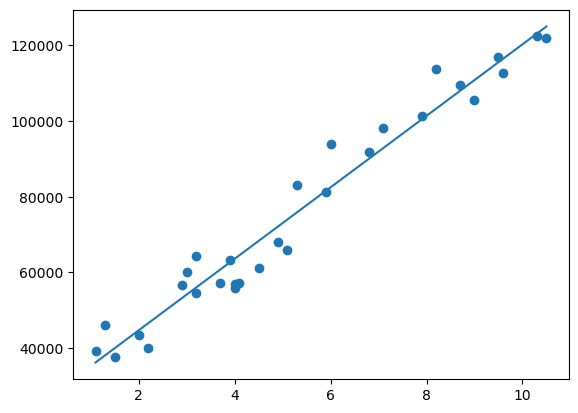

In [60]:
y_pred = (df.YearsExperience * theta[1]) + theta[0]

plt.scatter(x = df.YearsExperience, y = df.Salary)
plt.plot(df.YearsExperience, y_pred)
plt.show()